In [11]:
import pandas as pd
import numpy as np
import os
os.listdir('../data/people')

['sex_age', 'time', '테이블정의서.xlsx', '행정동경계파일']

# 성연령유동

In [61]:
#성연령유동
path = '../data/people/' + 'sex_age/'
file_list = os.listdir(path)

sex_age = pd.read_csv(path + file_list[0], sep = '|')

for file in file_list[1:] :
    aa = pd.read_csv(path + file, sep = '|')
    print(sex_age.shape)
    sex_age = sex_age.append(aa)
    
sex_age.reset_index(inplace = True, drop = True)

(1080, 34)
(2196, 34)
(3276, 34)
(4392, 34)
(5508, 34)
(6588, 34)
(7704, 34)
(8784, 34)
(9900, 34)
(11016, 34)
(12024, 34)


In [28]:
sex_age.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201804,20180401,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,...,1437.80,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
1,201804,20180401,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,...,6892.47,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
2,201804,20180401,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64
3,201804,20180401,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
4,201804,20180401,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41


In [62]:
sex_age['STD_YMD'] = pd.to_datetime(sex_age['STD_YMD'], format = '%Y%m%d')
print('{}부터 {}까지의 데이터'.format(sex_age['STD_YMD'].min(), sex_age['STD_YMD'].max()))

2018-04-01 00:00:00부터 2019-03-31 00:00:00까지의 데이터


In [75]:
woman = pd.melt(sex_age, id_vars =['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], value_vars = [col for col in sex_age.columns if 'WMAN' in col]) 
man = pd.melt(sex_age, id_vars =['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], value_vars = [col for col in sex_age.columns if ('WMAN' not in col) and ('MAN' in col)]) 

print('woman shape : ', woman.shape)
print('man shape : ', man.shape)

woman shape :  (197100, 6)
man shape :  (197100, 6)


In [83]:
woman['age'] = woman.variable.apply(lambda x : x.split('_')[-1])
woman['sex'] = 'W'
man['age'] = man.variable.apply(lambda x : x.split('_')[-1])
man['sex'] = 'M'

sex_age = pd.concat([woman, man]).reset_index(drop = True)
sex_age.drop('variable', axis = 1, inplace = True)

print(sex_age.shape)
sex_age.head(3)

(394200, 7)


,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,value,age,sex
0,201804,2018-04-01,1111051500,청운효자동,0.0,0004,W
1,201804,2018-04-01,1111053000,사직동,0.0,0004,W
2,201804,2018-04-01,1111054000,삼청동,0.0,0004,W


In [84]:
del woman, man

In [85]:
sex_age['HDONG_CD'] = sex_age['HDONG_CD'].apply(str)
sex_age['GU'] = sex_age['HDONG_CD'].apply(lambda x : x[:4]).map({'1111' : '종로구', '1135' : '노원구'})
sex_age['GU'].value_counts()

노원구    208050
종로구    186150
Name: GU, dtype: int64

In [106]:
sex_age['month'] = sex_age.STD_YMD.dt.month
sex_age['day'] = sex_age.STD_YMD.dt.day
sex_age['day_of_week'] = sex_age.STD_YMD.dt.day_name()
sex_age['day_of_week'] = sex_age['day_of_week'].map({'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3,
                                                    'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6})

In [132]:
#sex_age.to_csv(path + 'sex_age.csv', index = False, encoding = 'utf-8')

In [131]:
nowon.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'value', 'age', 'sex',
       'GU', 'month', 'day', 'day_of_week'],
      dtype='object')

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

Text(0.5, 1, '종로구 & 노원구 남/여 연령별 인구')

<Figure size 1080x720 with 0 Axes>

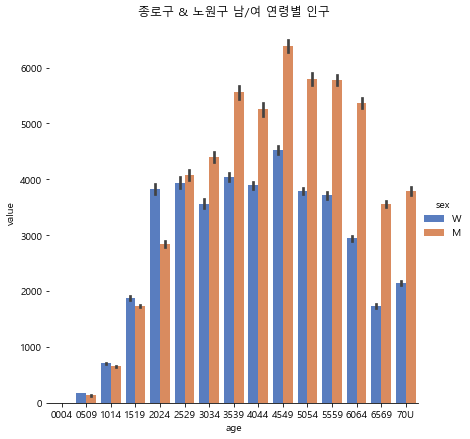

In [90]:
plt.figure(figsize = (15,10))
g = sns.catplot(x="age", y="value", hue="sex", data=sex_age,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
plt.title('종로구 & 노원구 남/여 연령별 인구')

In [107]:
jongno = sex_age[sex_age.GU == '종로구'].reset_index(drop = True)
nowon = sex_age[sex_age.GU == '노원구'].reset_index(drop = True)

Text(0.5, 1.0, '노원구 남/여 연령별 인구')

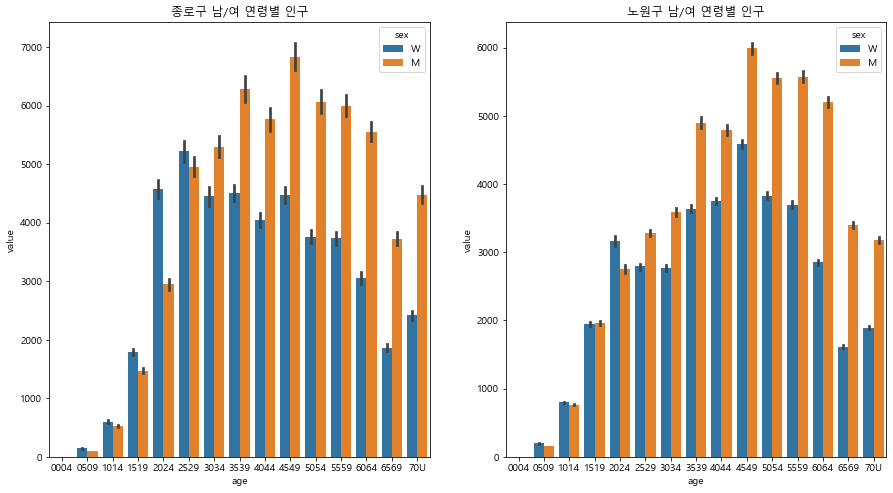

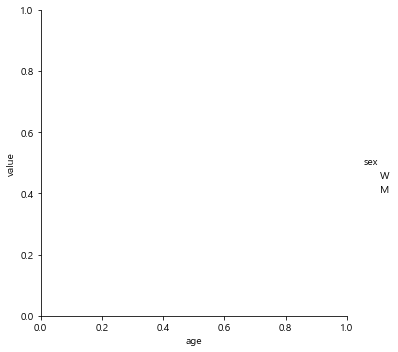

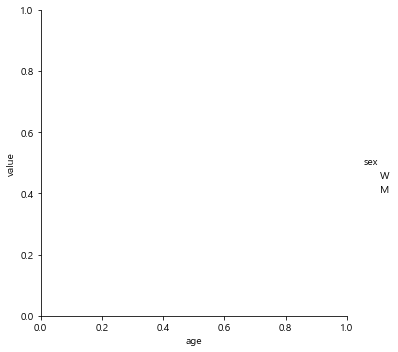

In [102]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))

sns.catplot(x="age", y="value", hue="sex", data=jongno, ax = axs[0], kind = 'bar')
axs[0].set_title('종로구 남/여 연령별 인구')

sns.catplot(x="age", y="value", hue="sex", data=nowon, ax = axs[1], kind = 'bar')
axs[1].set_title('노원구 남/여 연령별 인구')

In [108]:
jongno.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,value,age,sex,GU,month,day,day_of_week
0,201804,2018-04-01,1111051500,청운효자동,0.00,0004,W,종로구,4,1,6
1,201804,2018-04-01,1111053000,사직동,0.00,0004,W,종로구,4,1,6
2,201804,2018-04-01,1111054000,삼청동,0.00,0004,W,종로구,4,1,6
3,201804,2018-04-01,1111055000,부암동,0.00,0004,W,종로구,4,1,6
4,201804,2018-04-01,1111056000,평창동,0.11,0004,W,종로구,4,1,6


Text(0.5, 1.0, '노원구 남/여 요일별 인구')

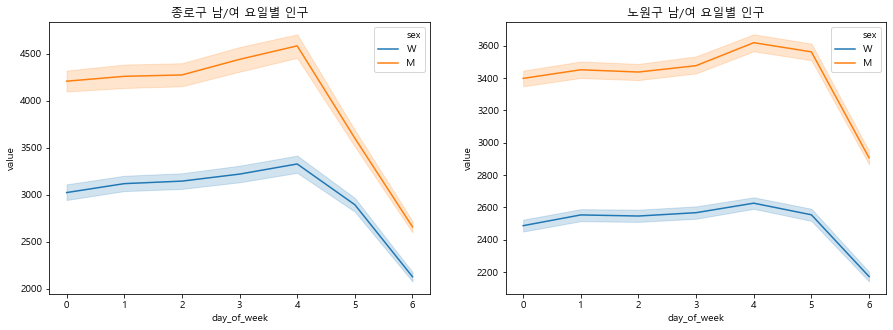

In [109]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

sns.lineplot(x="day_of_week", y="value", hue="sex", data = jongno, ax = axs[0])
axs[0].set_title('종로구 남/여 요일별 인구')

sns.lineplot(x="day_of_week", y="value", hue="sex", data = nowon, ax = axs[1])
axs[1].set_title('노원구 남/여 요일별 인구')

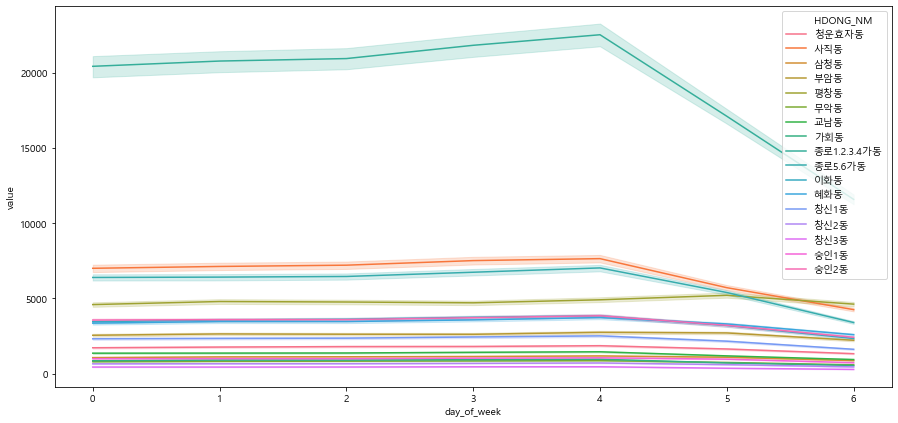

In [113]:
plt.figure(figsize = (15,7))
sns.lineplot(x="day_of_week", y="value", hue="HDONG_NM", data = jongno)

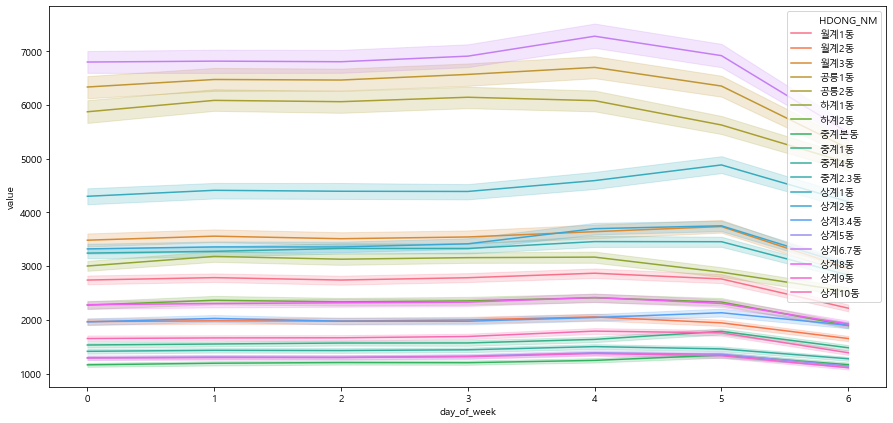

In [114]:
plt.figure(figsize = (15,7))
sns.lineplot(x="day_of_week", y="value", hue="HDONG_NM", data = nowon)

Text(0.5, 1.0, '노원구 남/여 월별 인구')

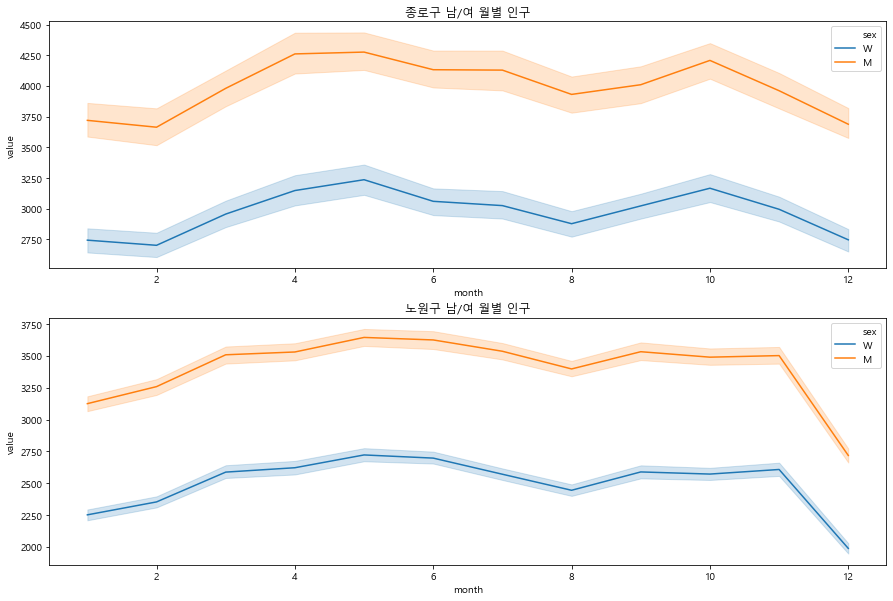

In [117]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,10))

sns.lineplot(x="month", y="value", hue="sex", data = jongno, ax = axs[0])
axs[0].set_title('종로구 남/여 월별 인구')


sns.lineplot(x="month", y="value", hue="sex", data = nowon, ax = axs[1])
axs[1].set_title('노원구 남/여 월별 인구')

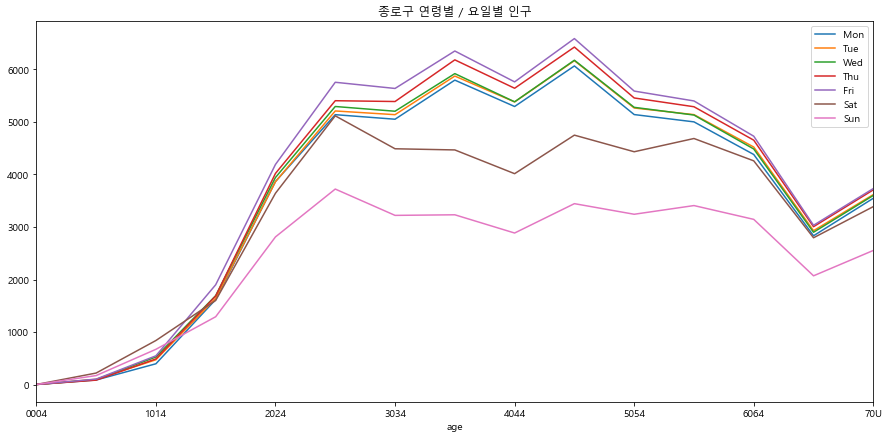

In [128]:
plt.figure(figsize = (15,7))
jongno[jongno.day_of_week == 0].groupby('age')['value'].mean().plot(label = 'Mon')
jongno[jongno.day_of_week == 1].groupby('age')['value'].mean().plot(label = 'Tue')
jongno[jongno.day_of_week == 2].groupby('age')['value'].mean().plot(label = 'Wed')
jongno[jongno.day_of_week == 3].groupby('age')['value'].mean().plot(label = 'Thu')
jongno[jongno.day_of_week == 4].groupby('age')['value'].mean().plot(label = 'Fri')
jongno[jongno.day_of_week == 5].groupby('age')['value'].mean().plot(label = 'Sat')
jongno[jongno.day_of_week == 6].groupby('age')['value'].mean().plot(label = 'Sun')

plt.title('종로구 연령별 / 요일별 인구')
plt.legend()

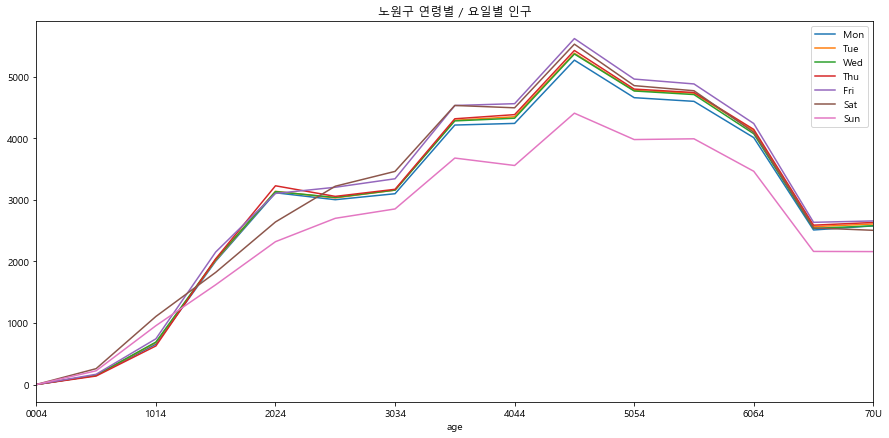

In [129]:
plt.figure(figsize = (15,7))
nowon[nowon.day_of_week == 0].groupby('age')['value'].mean().plot(label = 'Mon')
nowon[nowon.day_of_week == 1].groupby('age')['value'].mean().plot(label = 'Tue')
nowon[nowon.day_of_week == 2].groupby('age')['value'].mean().plot(label = 'Wed')
nowon[nowon.day_of_week == 3].groupby('age')['value'].mean().plot(label = 'Thu')
nowon[nowon.day_of_week == 4].groupby('age')['value'].mean().plot(label = 'Fri')
nowon[nowon.day_of_week == 5].groupby('age')['value'].mean().plot(label = 'Sat')
nowon[nowon.day_of_week == 6].groupby('age')['value'].mean().plot(label = 'Sun')

plt.title('노원구 연령별 / 요일별 인구')
plt.legend()

In [133]:
#성연령유동
path = '../data/people/' + 'time/'
file_list = os.listdir(path)

time = pd.read_csv(path + file_list[0], sep = '|')

for file in file_list[1:] :
    aa = pd.read_csv(path + file, sep = '|')
    print(time.shape)
    time = time.append(aa)
    
time.reset_index(inplace = True, drop = True)

(1080, 28)
(2196, 28)
(3276, 28)
(4392, 28)
(5508, 28)
(6588, 28)
(7704, 28)
(8784, 28)
(9900, 28)
(11016, 28)
(12024, 28)


In [136]:
time.columns

Index(['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'TMST_00', 'TMST_01',
       'TMST_02', 'TMST_03', 'TMST_04', 'TMST_05', 'TMST_06', 'TMST_07',
       'TMST_08', 'TMST_09', 'TMST_10', 'TMST_11', 'TMST_12', 'TMST_13',
       'TMST_14', 'TMST_15', 'TMST_16', 'TMST_17', 'TMST_18', 'TMST_19',
       'TMST_20', 'TMST_21', 'TMST_22', 'TMST_23'],
      dtype='object')

In [138]:
time = pd.melt(time, id_vars =['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], value_vars = [col for col in time.columns if 'TMST' in col]) 
print(time.shape)
time.head(3)

(315360, 6)


,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,variable,value
0,201804,20180401,1111051500,청운효자동,TMST_00,609.11
1,201804,20180401,1111053000,사직동,TMST_00,1904.32
2,201804,20180401,1111054000,삼청동,TMST_00,216.30


In [142]:
time.variable = time.variable.apply(lambda x : int(x[-2:]))
time.rename(columns = {'variable' : 'time'}, inplace = True)

In [144]:
time['HDONG_CD'] = time['HDONG_CD'].apply(str)
time['GU'] = time['HDONG_CD'].apply(lambda x : x[:4]).map({'1111' : '종로구', '1135' : '노원구'})
time['GU'].value_counts()

노원구    166440
종로구    148920
Name: GU, dtype: int64

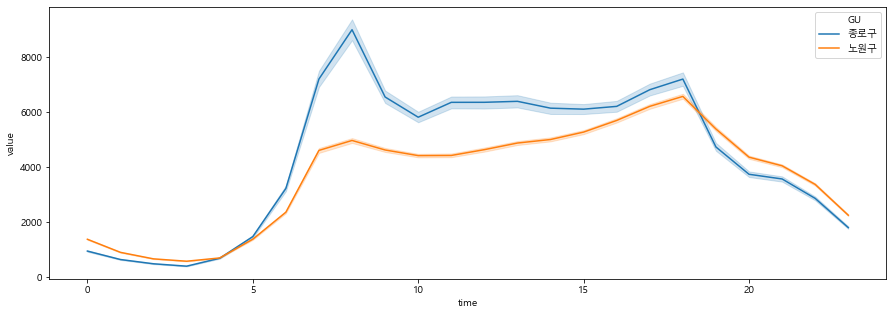

In [147]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'time', y = 'value', hue = 'GU', data = time)

In [149]:
time.HDONG_NM.value_counts()

상계3.4동         8760
상계6.7동         8760
이화동            8760
평창동            8760
상계10동          8760
중계2.3동         8760
사직동            8760
창신1동           8760
상계5동           8760
가회동            8760
상계9동           8760
하계1동           8760
공릉2동           8760
교남동            8760
종로1.2.3.4가동    8760
상계2동           8760
상계1동           8760
무악동            8760
숭인2동           8760
공릉1동           8760
중계본동           8760
숭인1동           8760
월계3동           8760
중계4동           8760
하계2동           8760
상계8동           8760
청운효자동          8760
창신2동           8760
중계1동           8760
종로5.6가동        8760
삼청동            8760
혜화동            8760
월계2동           8760
창신3동           8760
부암동            8760
월계1동           8760
Name: HDONG_NM, dtype: int64